# G2M insight for Cab Investment firm Report
Jinwen Li

# 1.Import data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cab_data = pd.read_csv('/Users/jinwen/Downloads/data_week2-main/Cab_Data.csv')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
city = pd.read_csv('/Users/jinwen/Downloads/data_week2-main/City.csv')
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
customer_id = pd.read_csv('/Users/jinwen/Downloads/data_week2-main/Customer_ID.csv')
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
transaction_id = pd.read_csv('/Users/jinwen/Downloads/data_week2-main/Transaction_ID.csv')
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
print(cab_data.shape)
print(city.shape)
print(customer_id.shape)
print(transaction_id.shape)

(359392, 7)
(20, 3)
(49171, 4)
(440098, 3)


# 2. Clean and Merge data

In [128]:
import datetime
col_new=[]
for i in range(len(date_of_travel)):
    delta=datetime.timedelta(int(date_of_travel[i]))
    today=datetime.datetime.strptime('1899-12-30','%Y-%m-%d')+delta    
    col_date=datetime.datetime.strftime(today,'%Y-%m-%d')
    col_new.append(col_date)

In [76]:
col_new[0:5]

['2016-01-08', '2016-01-06', '2016-01-02', '2016-01-07', '2016-01-03']

In [77]:
from pandas.core.frame import DataFrame
new_date=DataFrame(col_new)

In [78]:
new_cabdata=pd.concat([cab_data, new_date], axis=1)
new_cabdata.drop(labels='Date of Travel',axis=1)
n_cab_data=new_cabdata.drop(labels='Date of Travel',axis=1)

In [79]:
n_cab_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,0
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03


In [80]:
n_cab_data.rename(columns={0:'Date of travel'},inplace=True)
n_cab_data

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of travel
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03
...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-08
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05


## merge  tables

In [173]:
merge1=pd.merge(n_cab_data,transaction_id,on='Transaction ID')
merge1.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of travel,Customer ID,Payment_Mode
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08,29290,Card
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06,27703,Card
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02,28712,Cash
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07,28020,Cash
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03,27182,Card


In [174]:
merge2=pd.merge(merge1,customer_id,on='Customer ID')
merge2.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237


In [186]:
merge3=pd.merge(merge2,city,on='City')
merge3.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,"814,885","24,701"


In [90]:
merge3.isna().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Date of travel        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [187]:
merge3['Users'] = merge3['Users'].str.replace(r'[^\w\s]+', '')
merge3['Users']

/var/folders/fr/dbpwg_1n3g5cbkn5hwskw66c0000gn/T/ipykernel_72683/860635470.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merge3['Users'] = merge3['Users'].str.replace(r'[^\w\s]+', '')


0           24701 
1           24701 
2           24701 
3           24701 
4           24701 
            ...   
359387     127001 
359388     127001 
359389     127001 
359390     127001 
359391     127001 
Name: Users, Length: 359392, dtype: object

In [188]:
merge3['Population'] = merge3['Population'].str.replace(r'[^\w\s]+', '')

/var/folders/fr/dbpwg_1n3g5cbkn5hwskw66c0000gn/T/ipykernel_72683/3498145505.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merge3['Population'] = merge3['Population'].str.replace(r'[^\w\s]+', '')


In [189]:
merge3['Users']=merge3['Users'].astype(float)
merge3['Population']=merge3['Population'].astype(float)

In [190]:
merge3.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [191]:
new_data=merge3

# 3. Hypothesis and Investigate

In [95]:
new_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,"814,885","24,701"


### Hypothesis 1:Is there any seasonality in number of customers using the cab service?

In [104]:
# for Pink Cab
pink_c=new_data[new_data['Company']=='Pink Cab']
pink_c.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06,27703,Card,Male,27,9237,"814,885","24,701"
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.934,2018-10-27,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02,28712,Cash,Male,53,11242,"814,885","24,701"
11,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07,28020,Cash,Male,23,23327,"814,885","24,701"


In [110]:
pink_cab=pink_c.set_index('Date of travel')
pink_cab.head()


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Date of travel,,,,,,,,,,,,,
2016-01-08,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
2016-01-06,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2018-10-27,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,"814,885","24,701"
2016-01-02,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
2016-01-07,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"


In [124]:
pink_cab_month=pink_cab.groupby([pink_cab.index])['Transaction ID'].count()
pink_cab_month

Date of travel
2016-01-02     41
2016-01-03     52
2016-01-04      4
2016-01-05      6
2016-01-06     23
             ... 
2018-12-27     66
2018-12-28    217
2018-12-29    195
2018-12-30     56
2018-12-31     58
Name: Transaction ID, Length: 1095, dtype: int64

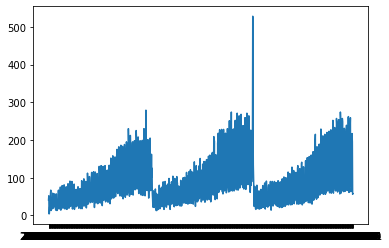

In [126]:
plt.plot(pink_cab_month)

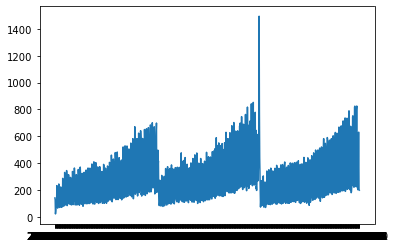

In [129]:
# for yellow cab (same method)
yellow_c=new_data[new_data['Company']=='Yellow Cab']
yellow_cab=yellow_c.set_index('Date of travel')
yellow_cab_month=yellow_cab.groupby([yellow_cab.index])['Transaction ID'].count()
plt.plot(yellow_cab_month)

### Hypothesis 2: the number of transactions is related with city's population number

In [198]:
new_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,814885.0,24701.0


In [135]:
transaction_numbers=new_data.groupby(new_data['City'])['Transaction ID'].count()
transaction_numbers

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction ID, dtype: int64

In [196]:
users_by_city=new_data.groupby('City')['Users'].agg([np.mean])

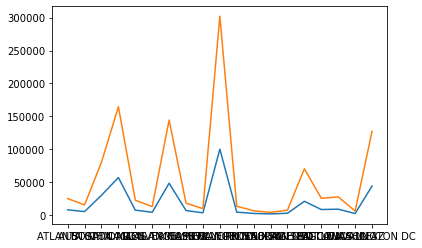

In [197]:
plt.plot(transaction_numbers)
plt.plot(users_by_city)

### Hypothesis 3: the number of users is related to city's population number

In [199]:
by_city_mean=new_data.groupby('City').agg([np.mean])
by_city_mean

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
,mean,mean,mean,mean,mean,mean,mean,mean,mean
City,,,,,,,,,
ATLANTA GA,1.022059e+07,22.316231,394.368363,282.891205,28493.319174,35.310308,14933.150986,814885.0,24701.0
AUSTIN TX,1.023061e+07,22.305413,383.403288,275.825465,34518.843750,35.336601,14696.495711,698371.0,14978.0
BOSTON MA,1.021653e+07,22.578074,348.907296,289.338413,58499.983969,35.177354,15128.563317,248968.0,80021.0
CHICAGO IL,1.021698e+07,22.634956,350.398561,290.578457,4505.538190,35.689978,15101.718269,1955130.0,164468.0
DALLAS TX,1.021894e+07,22.485685,447.830969,286.974012,25504.808465,35.681345,14846.508194,942908.0,22157.0
DENVER CO,1.022261e+07,22.449608,382.361179,278.417386,31500.812810,35.148235,14975.655163,754233.0,12421.0
LOS ANGELES CA,1.021800e+07,22.666410,370.487465,278.640013,7502.028293,35.659151,15064.550455,1595037.0,144132.0
MIAMI FL,1.023684e+07,22.531480,399.773040,282.279820,10509.906879,35.897583,14984.887202,1339155.0,17675.0


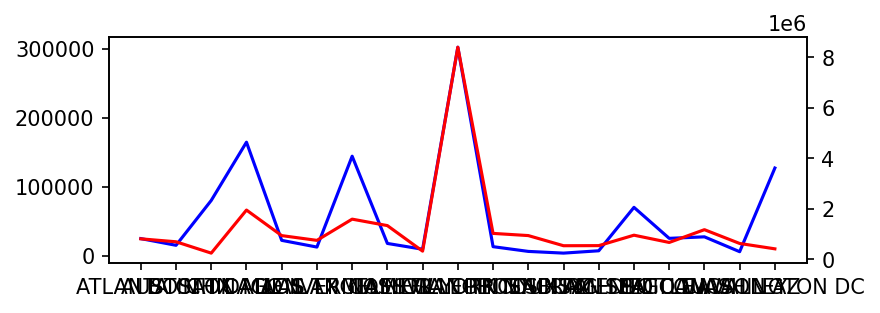

In [229]:
figure,(ax1) = plt.subplots(1,1,figsize=(6,2),
                                    dpi=150,sharex=True)
ax2 = ax1.twinx()
ax1.plot(users_by_city,c='blue',linestyle='-',label='RSI')
ax2.plot(by_city_mean['Population'],c='red',linestyle='-',label='Target')
plt.show()

### Hypothesis 4: the price charged is related to city's average income

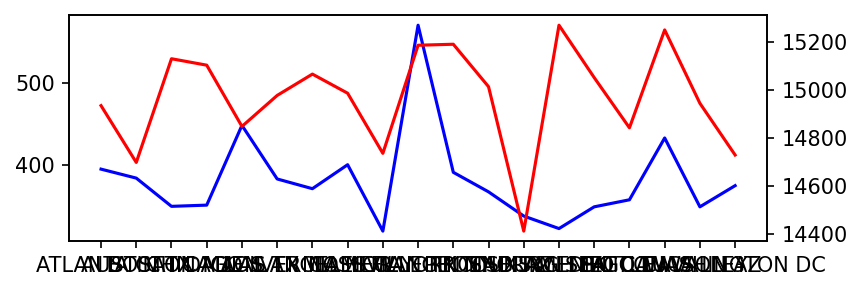

In [230]:
figure,(ax3) = plt.subplots(1,1,figsize=(6,2),
                                    dpi=150,sharex=True)
ax4 = ax3.twinx()
ax3.plot(by_city_mean['Price Charged'],c='blue',linestyle='-',label='RSI')
ax4.plot(by_city_mean['Income (USD/Month)'],c='red',linestyle='-',label='Target')
plt.show()

### Hypothesis 5: Average profit of  trips is related to the city's average income?

In [260]:
profit = new_data['Price Charged']-new_data['Cost of Trip']
#profit

In [242]:
by_city_sum=new_data.groupby('City').agg([np.sum])
profit_all=by_city_sum['Price Charged']-by_city_sum['Cost of Trip']

In [254]:
profit_city=profit_all['sum']/transaction_numbers
profit_city

City
ATLANTA GA        111.477158
AUSTIN TX         107.577824
BOSTON MA          59.568883
CHICAGO IL         59.820104
DALLAS TX         160.856957
DENVER CO         103.943793
LOS ANGELES CA     91.847452
MIAMI FL          117.493220
NASHVILLE TN       49.678478
NEW YORK NY       279.947491
ORANGE COUNTY     114.766920
PHOENIX AZ         93.479109
PITTSBURGH PA      64.863638
SACRAMENTO CA      49.567466
SAN DIEGO CA       77.467955
SEATTLE WA         75.613962
SILICON VALLEY    154.561013
TUCSON AZ          72.636300
WASHINGTON DC      79.860762
dtype: float64

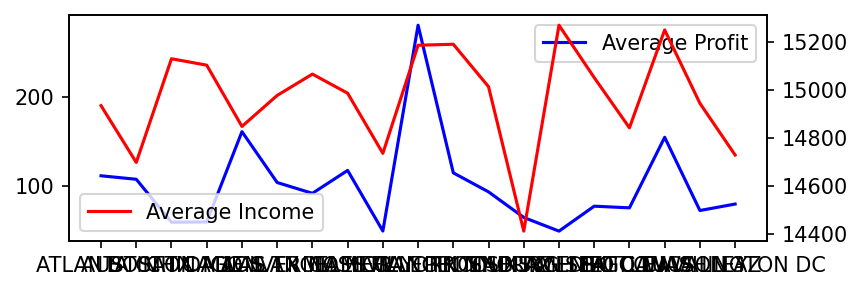

In [259]:
figure,(ax5) = plt.subplots(1,1,figsize=(6,2),
                                    dpi=150,sharex=True)
ax6 = ax5.twinx()
ax5.plot(profit_city,c='blue',linestyle='-',label='Average Profit')
ax6.plot(by_city_mean['Income (USD/Month)'],c='red',linestyle='-',label='Average Income')
ax5.legend()
ax6.legend()
plt.show()

# 4.EDA Recommendation and Hypothesis Results

### Hypothesis Results:
1.Is there any seasonality in number of customers using the cab service?  
From above charts, we can see the obvious trends that prove there is a seasonality in number of customers using the cab service. For both companies, Customers use taxis least at the beginning of the year and then increase, with the most taxis in the fourth quarter.  

2.the number of transactions is related with city's population number?  
Yes, we can see the more the city's population, the more the transactions have. 

3.the number of users is related to city's population number?  
Yes, the number of users is related to city's population number, we can see from above charts, New York city has the most population 8405837, and it has the most users	302149.   

4.the price charged is related to city's average income?  
By case, from some cities, we cannot see the trend, but some cities, we can see the higher this city's average income, the higher the price charged.  

5.Average profit of  trips is related to the city's average income?   
We cannot get any absolute relationship between the profit of trips and the city's average income. 

### Recommendation
From above hypothesis, we can see there is a seasonality in number of customers using the cab service, so the cab company can hire more cab drivers in fall or winter and hire fewer drivers in spring quarter to get more profit.  

Also, the number of transactions and users are related with city's population number, so cab company can pay more attention to some cities which have more populations.  

From above, we can see cab transactions in New York city is the most profitable transactions, so cab company  can expand their business in New York city.